In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Load MNIST Dataset 

In [0]:
train = pd.read_csv("/content/drive/My Drive/MNIST/train.csv")
test = pd.read_csv("/content/drive/My Drive/MNIST/test.csv")

In [0]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [0]:
X_train=train.drop(labels = ["label"],axis = 1) 
Y_train=train['label']
print(X_train.shape)
print(Y_train.shape)

(42000, 784)
(42000,)


In [0]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

### Check for skewed classes

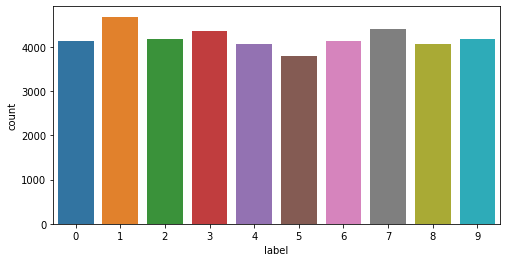

In [0]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=train);

### Normalizing Data

In [0]:
X_train=X_train.astype('float32')/255
test=test.astype('float32')/255

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [0]:
print(X_train.shape, test.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1)


### Label Encoding

In [0]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

Using TensorFlow backend.


In [0]:
Y_train.shape

(42000, 10)

### Validation Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

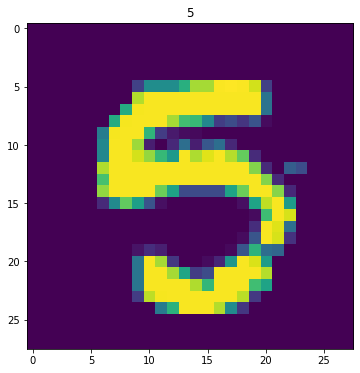

In [0]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[1][:,:,0])
plt.title(Y_train[1].argmax());

### CNN Model

In [0]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [0]:
inputShape=(28,28,1)
input = Input(inputShape)

x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv1',padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)



x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)

x = Conv2D(32,(3,3),strides = (1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool3')(x)


x = Flatten()(x)
x = Dense(64,activation = 'relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation = 'relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation = 'softmax',name='fc2')(x)

model = Model(inputs = input,outputs = x,name='Predict')













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "Predict"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256 

### Optimizer

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [0]:
history=model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid),
                          epochs=35,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 37800 samples, validate on 4200 samples
Epoch 1/35
37800/37800 [==============================] - 11s 301us/step - loss: 0.3327 - acc: 0.8992 - val_loss: 0.0708 - val_acc: 0.9814
Epoch 2/35
37800/37800 [==============================] - 9s 246us/step - loss: 0.1075 - acc: 0.9716 - val_loss: 0.1114 - val_acc: 0.9729
Epoch 3/35
37800/37800 [==============================] - 10s 253us/step - loss: 0.0811 - acc: 0.9783 - val_loss: 0.0654 - val_acc: 0.9831
Epoch 4/35
37800/37800 [==============================] - 9s 245us/step - loss: 0.0657 - acc: 0.9825 - val_loss: 0.0437 - val_acc: 0.9898
Epoch 5/35
37800/37800 [==============================] - 10s 255us/step - loss: 0.0556 - acc: 0.9852 - val_loss: 0.0465 - val_acc: 0.9867
Epoch 6/35
37800/37800 [==============================] - 9s 243us/step - loss: 0.0499 - acc: 0.9864 - val_loss: 0.0706 - val_acc: 0.9802
Epoch 7/35
37800/37800 [

### Save Model to Drive

In [0]:
model.save("/content/drive/My Drive/MNIST/cnn.h5")

### Load Model from Drive

In [0]:
model = keras.models.load_model("/content/drive/My Drive/MNIST/cnn.h5")

### Model Evaluation

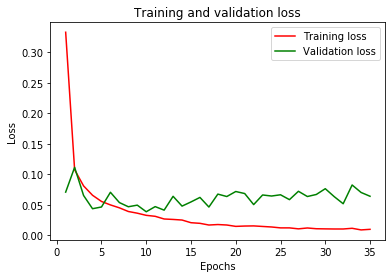

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

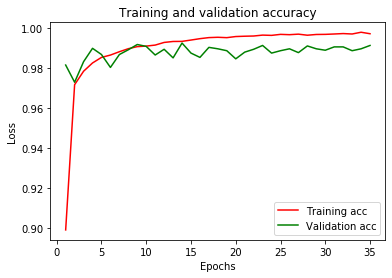

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
print("on valid data")
pred1=model.evaluate(X_valid,Y_valid)
print("accuaracy", str(pred1[1]*100))
print("Total loss",str(pred1[0]*100))

on valid data
4200/4200 [==============================] - 0s 105us/step
accuaracy 99.11904761904762
Total loss 6.405803079562271


### Visualizing CNN

In [0]:
im1 = X_train[10]
from skimage.transform import rotate, AffineTransform, warp
transform = AffineTransform(translation=(-4,0))
im2 = warp(im1,transform, mode="wrap") #mode parameter is optional


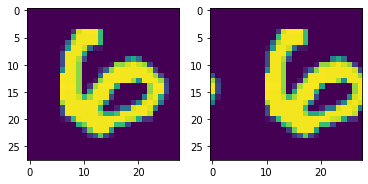

In [0]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(im1[:, :, 0])
axarr[1].imshow(im2[:, :, 0])

In [0]:
from keras.models import Model

layer_outputs = [layer.output for layer in model.layers] 
layer_outputs = layer_outputs[1:] 
activation_model = Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(im1.reshape(1,28,28,1))
act_shift = activation_model.predict(im2.reshape(1,28,28,1))
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    # if(not flag):
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            # if(flag):
            # buff.append(activation[0, :, :, activation_index])
            # else:
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

#### Original Image

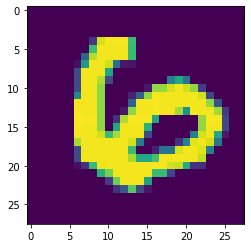

In [0]:
plt.imshow(im1[:,:,0])

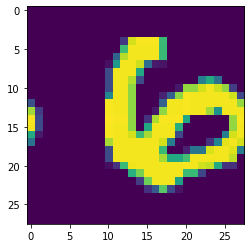

In [0]:
plt.imshow(im2[:,:,0])

#### Feature Maps after different layers

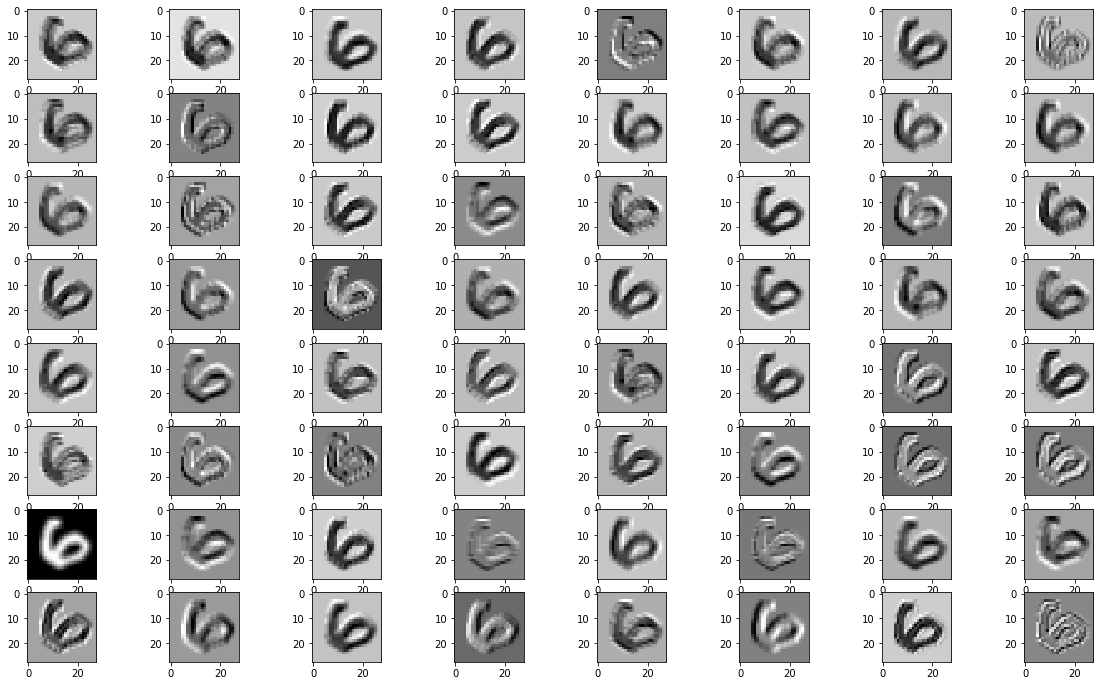

In [0]:
display_activation(activations, 8, 8, 1)

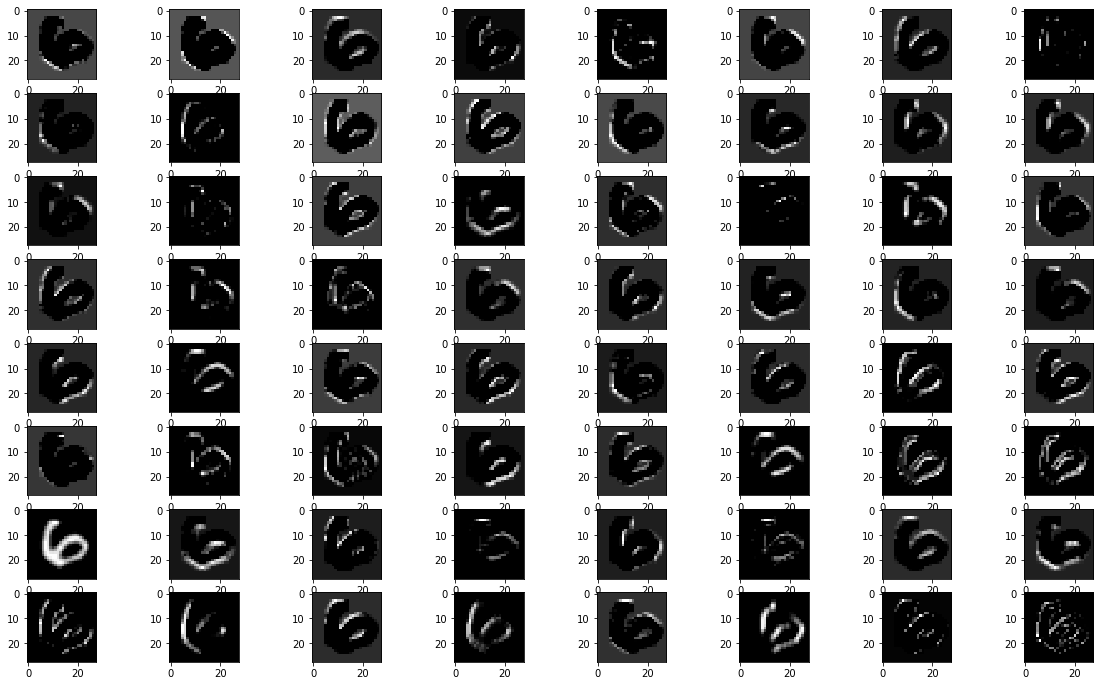

In [0]:
display_activation(activations, 8, 8, 2)

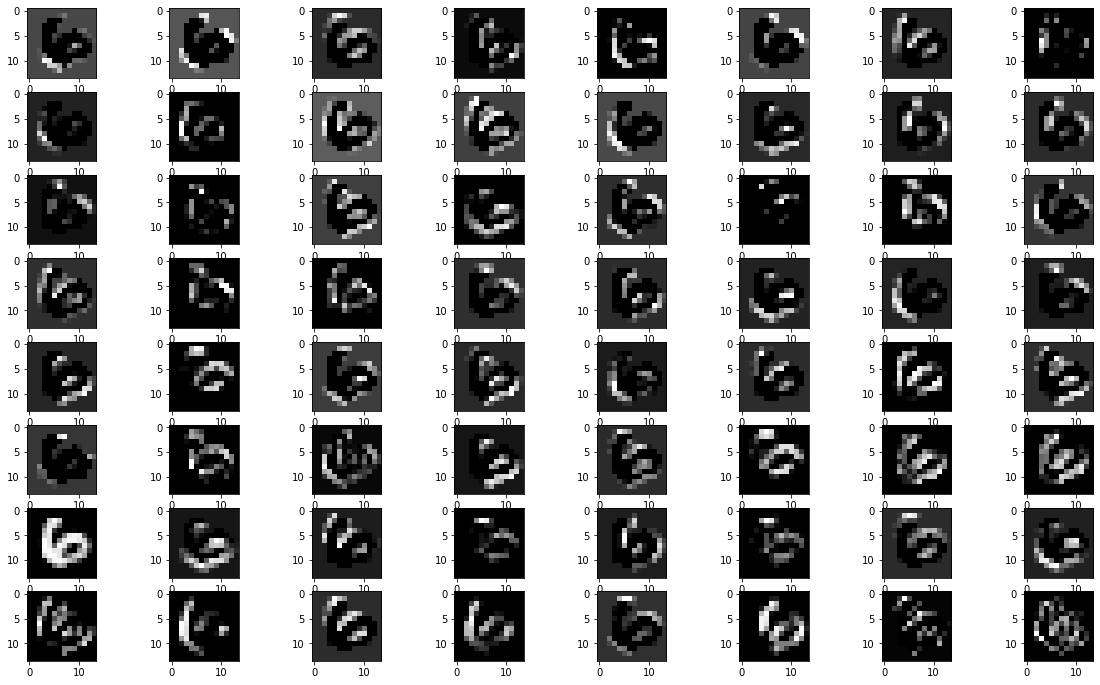

In [0]:
display_activation(activations, 8, 8, 3)

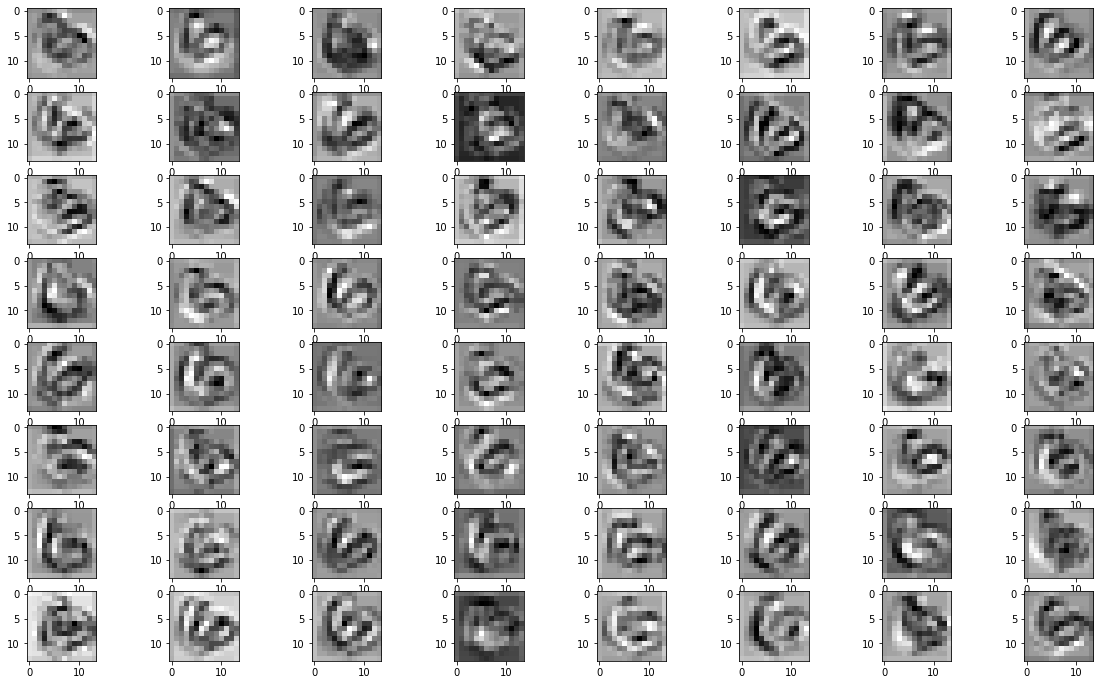

In [0]:
display_activation(activations, 8, 8, 4)

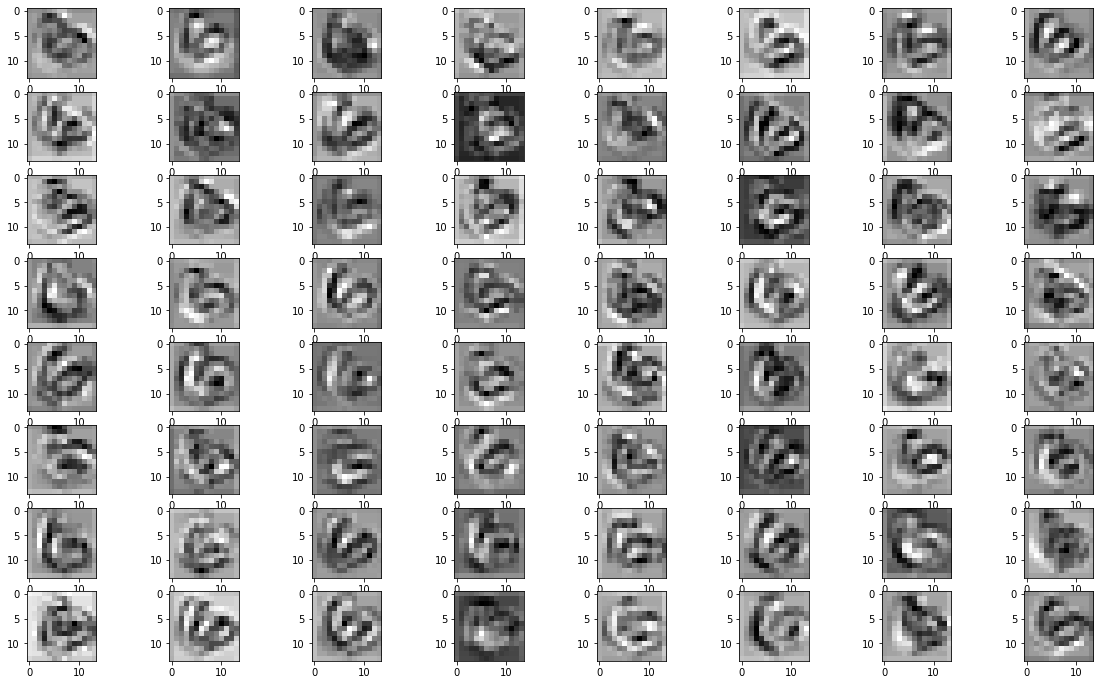

In [0]:
display_activation(activations, 8, 8, 5)

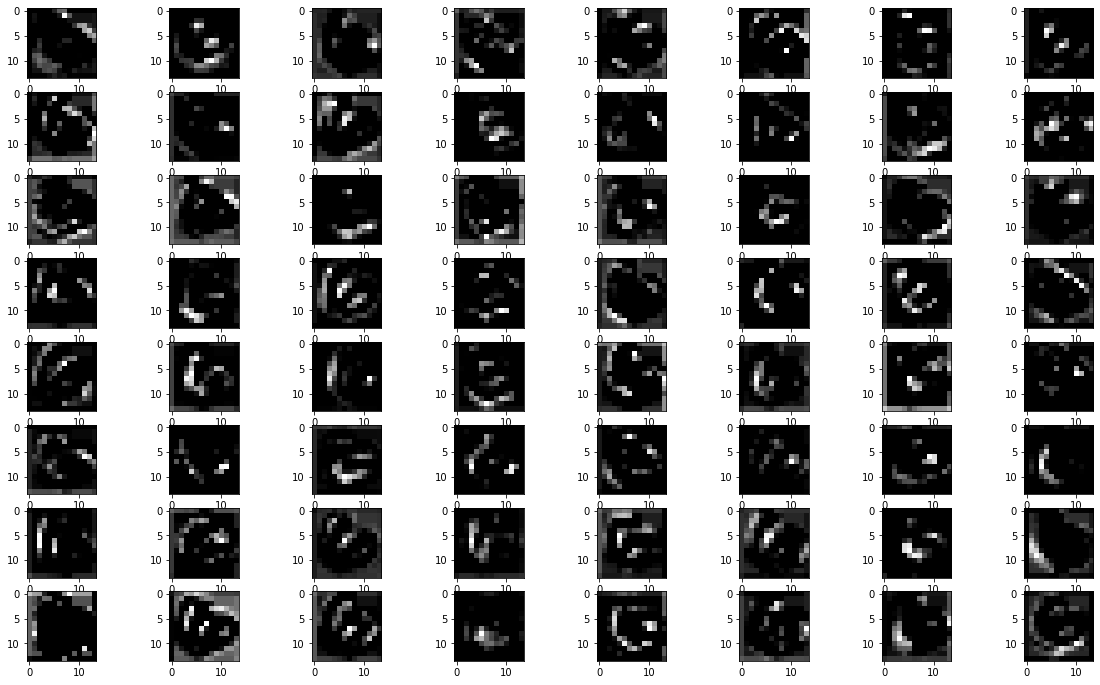

In [0]:
display_activation(activations, 8, 8, 6)

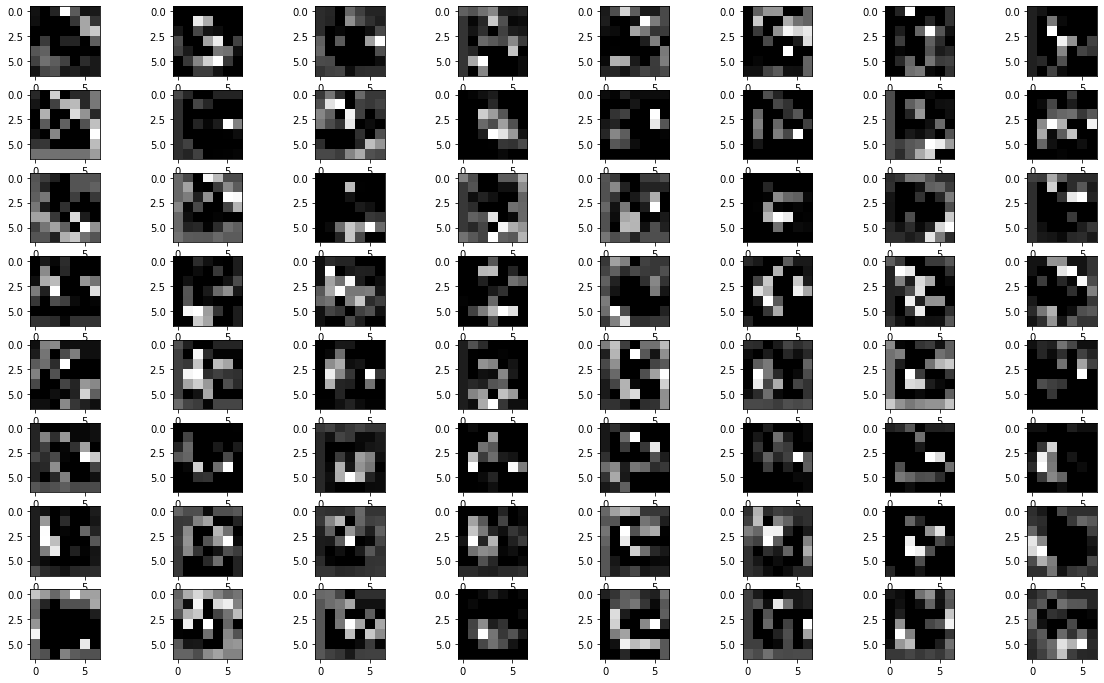

In [0]:
display_activation(activations, 8, 8, 7)

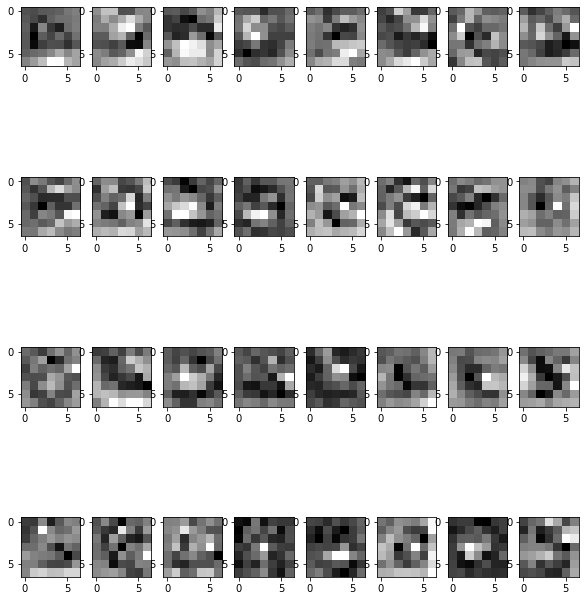

In [0]:
display_activation(activations, 8, 4, 8)

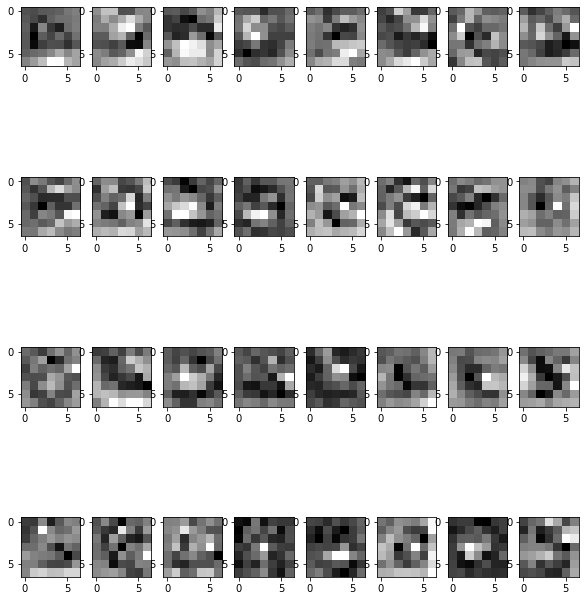

In [0]:
display_activation(activations, 8, 4, 9)

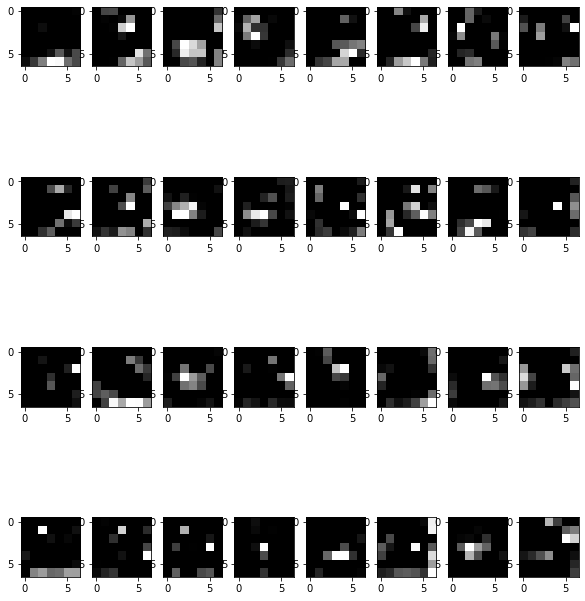

In [0]:
display_activation(activations, 8, 4, 10)

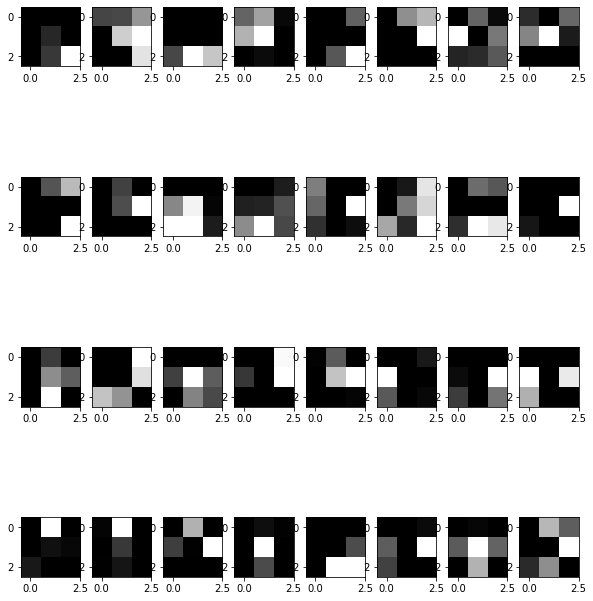

In [0]:
display_activation(activations, 8, 4, 11)

In [0]:
# buf_o, buf_s = [], []
# display_activation(activations, 8, 8, 4, buf_o, True)
# display_activation(act_shift, 8, 8, 4, buf_s, True)

In [0]:
# buf_o = np.asarray(buf_o)
# buf_s = np.asarray(buf_s)
# print(buf_o.shape, buf_s.shape)

In [0]:
# diff = buf_s - buf_o
# b_o = np.ndarray.flatten(buf_o)
# b_s = np.ndarray.flatten(buf_s)
# d = np.ndarray.flatten(diff)
# l = [x for x in range(len(d))]
# plt.scatter(l, b_o, color = 'red', label = 'original')
# plt.scatter(l, b_s, color = 'blue', label = 'shifted')
# plt.scatter(l, d, color = 'green', label = 'diff')
# plt.show()

### Translation Invariance

In [0]:
im2 = im2.reshape((1, im2.shape[0], im2.shape[1], im2.shape[2]))
y = model.predict(im2)
print(y)

[[1.7161855e-07 2.6288702e-12 1.2824740e-14 4.3747839e-14 4.0980548e-12
  7.0452360e-09 9.9999988e-01 1.4649304e-14 1.6475409e-09 4.8292657e-17]]


In [0]:
im1 = im1.reshape((1, im1.shape[0], im1.shape[1], im1.shape[2]))
y = model.predict(im1)
print(y)

[[6.0971110e-16 5.4432433e-28 4.1062289e-32 7.8565869e-29 2.3329205e-25
  1.5869558e-17 1.0000000e+00 4.6238070e-32 2.0288019e-18 3.4794730e-35]]


### Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(X_valid)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_valid,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

In [0]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");